In [1]:
%pip install torch


  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached MarkupSafe-3.0.2-cp39-cp39-win_amd64.whl.metadata (4.1 kB)
   ---------------------------------------- 0.0/212.4 MB ? eta -:--:--
    --------------------------------------- 5.2/212.4 MB 35.6 MB/s eta 0:00:06
   -- ------------------------------------- 15.5/212.4 MB 42.4 MB/s eta 0:00:05
   ---- ----------------------------------- 25.2/212.4 MB 43.1 MB/s eta 0:00:05
   ------ --------------------------------- 36.4/212.4 MB 45.4 MB/s eta 0:00:04
   -------- ------------------------------- 47.2/212.4 MB 46.2 MB/s eta 0:00:04
   ---------- ----------------------------- 54.3/212.4 MB 44.3 MB/s eta 0:00:04
   ------------ --------------------------- 64.0/212.4 MB 44.3 MB/s eta 0:00:04
   ------------- -------------------------- 73.9/212.4 MB 44.9 MB/s eta 0:00:04
   --------------- --

In [11]:
pip show qiskit

Name: qiskit
Version: 2.0.0
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: c:\users\owais\miniconda3\envs\quantum-env\lib\site-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer
Note: you may need to restart the kernel to use updated packages.


In [92]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [93]:
import pandas as pd
from IPython.display import display, Markdown

# Display metadata as a table (if it's a dictionary)
metadata = breast_cancer_wisconsin_diagnostic.metadata
if isinstance(metadata, dict):
    meta_df = pd.DataFrame(list(metadata.items()), columns=['Property', 'Value'])
    display(Markdown("### 📋 Dataset Metadata"))
    display(meta_df.style.set_properties(**{'text-align': 'left'}))
else:
    print(metadata)

# Display variable information as a table (if it's a dictionary)
variables = breast_cancer_wisconsin_diagnostic.variables
if isinstance(variables, dict):
    var_df = pd.DataFrame([
        {'Variable': k, **v} if isinstance(v, dict) else {'Variable': k, 'Description': v}
        for k, v in variables.items()
    ])
    display(Markdown("### 🧬 Variable Information"))
    display(var_df.style.set_properties(**{'text-align': 'left'}))
else:
    print(variables)

### 📋 Dataset Metadata

,Property,Value
0,uci_id,17
1,name,Breast Cancer Wisconsin (Diagnostic)
2,repository_url,https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
3,data_url,https://archive.ics.uci.edu/static/public/17/data.csv
4,abstract,Diagnostic Wisconsin Breast Cancer Database.
5,area,Health and Medicine
6,tasks,['Classification']
7,characteristics,['Multivariate']
8,num_instances,569
9,num_features,30


                  name     role         type demographic description units  \
0                   ID       ID  Categorical        None        None  None   
1            Diagnosis   Target  Categorical        None        None  None   
2              radius1  Feature   Continuous        None        None  None   
3             texture1  Feature   Continuous        None        None  None   
4           perimeter1  Feature   Continuous        None        None  None   
5                area1  Feature   Continuous        None        None  None   
6          smoothness1  Feature   Continuous        None        None  None   
7         compactness1  Feature   Continuous        None        None  None   
8           concavity1  Feature   Continuous        None        None  None   
9      concave_points1  Feature   Continuous        None        None  None   
10           symmetry1  Feature   Continuous        None        None  None   
11  fractal_dimension1  Feature   Continuous        None        

In [94]:
from IPython.display import display, Markdown

display(Markdown("""
# 🩺 Wisconsin Diagnostic Breast Cancer Dataset

**Source:**  
- Dr. William H. Wolberg, University of Wisconsin  
- W. Nick Street, University of Wisconsin  
- Olvi L. Mangasarian, University of Wisconsin  

**Number of Instances:** 569  
**Number of Features:** 30 (real-valued, computed from cell nuclei images)  
**Target:** Diagnosis (M = Malignant, B = Benign)

---
"""))


# 🩺 Wisconsin Diagnostic Breast Cancer Dataset

**Source:**  
- Dr. William H. Wolberg, University of Wisconsin  
- W. Nick Street, University of Wisconsin  
- Olvi L. Mangasarian, University of Wisconsin  

**Number of Instances:** 569  
**Number of Features:** 30 (real-valued, computed from cell nuclei images)  
**Target:** Diagnosis (M = Malignant, B = Benign)

---


In [95]:
import pandas as pd
from IPython.display import display, Markdown

# Assuming y is your target DataFrame
class_counts = y['Diagnosis'].value_counts().rename_axis('Diagnosis').reset_index(name='Count')
class_counts['Proportion (%)'] = (class_counts['Count'] / class_counts['Count'].sum() * 100).round(2)

display(Markdown("### 📊 Class Distribution"))

# Add a colorful background gradient to the table
styled_table = class_counts.style.background_gradient(
    subset=['Count', 'Proportion (%)'], cmap='coolwarm'
).set_properties(**{'text-align': 'center'})

display(styled_table)

### 📊 Class Distribution

,Diagnosis,Count,Proportion (%)
0,B,357,62.740000
1,M,212,37.260000


Class Counts:
Diagnosis
B    357
M    212
Name: count, dtype: int64
------------------------------

Class Proportions (%):
Diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64
------------------------------


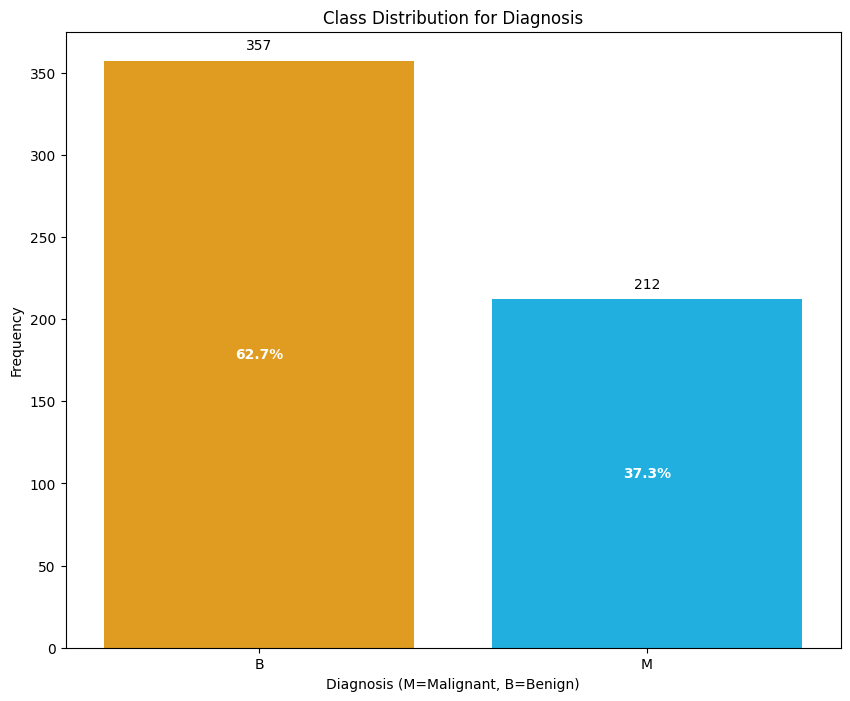


Ratio of minority to majority class: 0.59
The dataset is somewhat imbalanced but might be acceptable for some models.


In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# The 'y' DataFrame contains the target variable.
target_series = y['Diagnosis']

# 1. Count Class Occurrences
class_counts = target_series.value_counts()
print("Class Counts:")
print(class_counts)
print("-" * 30)

# 2. Calculate Class Proportions
class_proportions = target_series.value_counts(normalize=True) * 100
print("\nClass Proportions (%):")
print(class_proportions)
print("-" * 30)

# 3. Visualize the Distribution with custom colors
plt.figure(figsize=(10, 8))
custom_palette = ['#00BFFF', '#FFA500']  # Blue and Orange
sns.countplot(x=target_series, hue=target_series, order=class_counts.index, palette=custom_palette, legend=False)
plt.title('Class Distribution for Diagnosis')
plt.xlabel('Diagnosis (M=Malignant, B=Benign)')
plt.ylabel('Frequency')

# Annotate bars with counts
for i, count in enumerate(class_counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom') 

# Annotate bars with percentages
for i, proportion in enumerate(class_proportions):
    plt.text(i, class_counts.iloc[i] / 2, f'{proportion:.1f}%', ha='center', va='center', color='white', fontweight='bold')

#plt.ylim(0, class_counts.max())  # Add headroom for annotations
plt.show()

# 4. Interpretation
ratio = class_counts.min() / class_counts.max()
print(f"\nRatio of minority to majority class: {ratio:.2f}")

if ratio > 0.7:
    print("The dataset is relatively balanced.")
elif ratio > 0.4: 
    print("The dataset is somewhat imbalanced but might be acceptable for some models.")
else:
    print("The dataset is imbalanced. Consider using techniques to handle imbalance.")

In [97]:
import torch
import torch.nn as nn
from torch.autograd import Function
import numpy as np
import pandas as pd
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.primitives import StatevectorEstimator
from qiskit.quantum_info import SparsePauliOp

# Prep Training Data (Breast Cancer Wisconsin)
df = pd.read_csv("D:\\PHD\\FLIQ-Hackathon\\FLiQHackathon\\Datasets\\wdbc.data", header=None)
columns = ['id', 'diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
df.columns = columns
df = df.drop(columns=['id'])
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop(columns=['diagnosis']).values.astype(np.float32)
Y = df['diagnosis'].values.astype(np.float32).reshape(-1, 1)

# Normalize (z-score)
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

# Convert to torch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32)

# Train/Test split
num_samples = X_tensor.shape[0]
indices = torch.randperm(num_samples)
split_idx = int(num_samples * 0.8)
train_indices = indices[:split_idx]
test_indices = indices[split_idx:]

X_train = X_tensor[train_indices]
Y_train = Y_tensor[train_indices]
X_test = X_tensor[test_indices]
Y_test = Y_tensor[test_indices]

# Quantum Circuit
n_qubits = 2
params = ParameterVector('theta', length=4)

# def create_vqa_circuit(input_data, weights):
#     qc = QuantumCircuit(n_qubits)
    
#     # Encode up to n_qubits classical inputs into all qubits (use modulo if fewer features)
#     for i in range(n_qubits):
#         qc.ry(float(input_data[i % len(input_data)]), i)
#         qc.rz(float(input_data[i % len(input_data)]), i)
    
#     # Add a parameterized layer (RY, RZ) on all qubits
#     for i in range(n_qubits):
#         qc.ry(weights[i], i)
#         qc.rz(weights[n_qubits + i], i)
    
#     # Add entanglement (CNOT ring)
#     for i in range(n_qubits):
#         qc.sx(i)
#         #qc.swap(i, (i + 1) % n_qubits)
#         qc.cx(i, (i + 1) % n_qubits)
    
#     # Add a second parameterized layer for more expressivity
#     for i in range(n_qubits):
#         qc.rx(weights[2 * n_qubits + i], i)
#         qc.rz(weights[3 * n_qubits + i], i)
    
#    return qc

def create_vqa_circuit(input_data, weights):
    qc = QuantumCircuit(n_qubits)
    
    # Encode 2 classical inputs into qubit rotations
    qc.ry(float(input_data[0]), 0)
    qc.ry(float(input_data[1]), 1)
    
    # Parameterized entangling gates
    qc.rz(weights[0], 0)
    qc.rz(weights[1], 1)
    qc.cx(0, 1)
    qc.ry(weights[2], 0)
    qc.ry(weights[3], 1)
    
    return qc


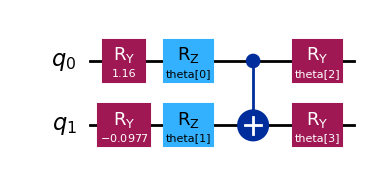

In [98]:
qc = create_vqa_circuit(X_train[0].numpy(), params)
qc.draw('mpl')

In [100]:
# Estimator and observable
estimator = StatevectorEstimator()
#observables = [SparsePauliOp("ZZ"), SparsePauliOp("XX")]
observables = [SparsePauliOp("ZZ")]

# Autograd Function
class VQALayerFunction(Function):
    @staticmethod
    def forward(ctx, input_tensor, weights):
        input_vals = input_tensor.detach().numpy()
        weight_vals = weights.detach().numpy()
        ctx.save_for_backward(input_tensor, weights)

        qc = create_vqa_circuit(input_vals, weight_vals)
        job = estimator.run([(qc, observables)])
        expval = job.result()[0].data.evs[0]

        return torch.tensor([expval], dtype=torch.float32)

    @staticmethod
    def backward(ctx, grad_output):
        input_tensor, weights = ctx.saved_tensors
        input_vals = input_tensor.detach().numpy()
        weight_vals = weights.detach().numpy()
        shift = np.pi / 2
        grads = []

        for i in range(len(weight_vals)):
            shifted_plus = weight_vals.copy()
            shifted_plus[i] += shift
            shifted_minus = weight_vals.copy()
            shifted_minus[i] -= shift

            qc_plus = create_vqa_circuit(input_vals, shifted_plus)
            qc_minus = create_vqa_circuit(input_vals, shifted_minus)

            result_plus = estimator.run([(qc_plus, observables)]).result()[0].data.evs[0]
            result_minus = estimator.run([(qc_minus, observables)]).result()[0].data.evs[0]

            grad = 0.5 * (result_plus - result_minus)
            grads.append(grad)

        grads_tensor = torch.tensor(grads, dtype=torch.float32)
        return None, (grad_output.view(-1)[0] * grads_tensor).view(-1)

# PyTorch Quantum Layer
class VQALayer(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(4))  # Use 4 or 4* n_qubits parameters

    def forward(self, x):
        return torch.stack([VQALayerFunction.apply(x[i], self.weights) for i in range(x.size(0))]).view(-1, 1)

# Full Hybrid Model
class HybridModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.classical = nn.Linear(X_tensor.shape[1], 2) # Classical linear layer
        self.quantum = VQALayer() # Quantum layer
        self.output = nn.Linear(1, 1) #Classical output layer

    def forward(self, x):
        x = self.classical(x)
        x = torch.tanh(x)
        x = self.quantum(x)
        x = self.output(x)
        return torch.sigmoid(x)

# Initialize model and training components
model = HybridModel()
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)  # Learning rate = [0.05, 0.02, 0.01, 0.005, 0.002, 0.001] [10^-1 to 10^-3]
loss_fn = nn.BCELoss()

# Training loop
for epoch in range(100):
    optimizer.zero_grad()
    preds = model(X_train)
    loss = loss_fn(preds, Y_train)
    loss.backward()
    optimizer.step()
    with torch.no_grad():
        acc = ((preds > 0.5).float() == Y_train).float().mean()
        print(f"Epoch {epoch+1} | Loss: {loss.item():.4f} | Accuracy: {acc.item()*100:.2f}%")

# Testing loop
with torch.no_grad():
    test_preds = model(X_test)
    test_loss = loss_fn(test_preds, Y_test)
    test_acc = ((test_preds > 0.5).float() == Y_test).float().mean()
    print(f"\nTest Loss: {test_loss.item():.4f} | Test Accuracy: {test_acc.item()*100:.2f}%")

Epoch 1 | Loss: 0.6866 | Accuracy: 60.88%
Epoch 2 | Loss: 0.6744 | Accuracy: 61.32%
Epoch 3 | Loss: 0.6642 | Accuracy: 63.08%
Epoch 4 | Loss: 0.6562 | Accuracy: 63.08%
Epoch 5 | Loss: 0.6504 | Accuracy: 63.08%
Epoch 6 | Loss: 0.6468 | Accuracy: 63.08%
Epoch 7 | Loss: 0.6450 | Accuracy: 63.08%
Epoch 8 | Loss: 0.6446 | Accuracy: 63.08%
Epoch 9 | Loss: 0.6452 | Accuracy: 63.08%
Epoch 10 | Loss: 0.6461 | Accuracy: 63.08%
Epoch 11 | Loss: 0.6469 | Accuracy: 63.08%
Epoch 12 | Loss: 0.6474 | Accuracy: 63.08%
Epoch 13 | Loss: 0.6474 | Accuracy: 63.08%
Epoch 14 | Loss: 0.6468 | Accuracy: 63.08%
Epoch 15 | Loss: 0.6458 | Accuracy: 63.08%
Epoch 16 | Loss: 0.6445 | Accuracy: 63.08%
Epoch 17 | Loss: 0.6430 | Accuracy: 63.08%
Epoch 18 | Loss: 0.6415 | Accuracy: 63.08%
Epoch 19 | Loss: 0.6397 | Accuracy: 63.08%
Epoch 20 | Loss: 0.6378 | Accuracy: 63.08%
Epoch 21 | Loss: 0.6356 | Accuracy: 63.08%
Epoch 22 | Loss: 0.6330 | Accuracy: 63.08%
Epoch 23 | Loss: 0.6299 | Accuracy: 63.08%
Epoch 24 | Loss: 0.6

In [101]:
import sklearn.metrics as metrics

# Get predicted labels (0 or 1)
y_true = Y_test.numpy().flatten()
y_pred = (test_preds.numpy().flatten() > 0.5).astype(int)

# Metrics
accuracy = metrics.accuracy_score(y_true, y_pred)
precision = metrics.precision_score(y_true, y_pred)
recall = metrics.recall_score(y_true, y_pred)
f1 = metrics.f1_score(y_true, y_pred)
conf_matrix = metrics.confusion_matrix(y_true, y_pred)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# False positives and false negatives
fp = conf_matrix[0,1]
fn = conf_matrix[1,0]
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

Accuracy:  0.8947
Precision: 0.9211
Recall:    0.7955
F1 Score:  0.8537
Confusion Matrix:
[[67  3]
 [ 9 35]]
False Positives: 3
False Negatives: 9


In [102]:
# Class distribution in the whole dataset
print("Class distribution in the dataset:")
print(df['diagnosis'].value_counts())

Class distribution in the dataset:
diagnosis
0    357
1    212
Name: count, dtype: int64


In [103]:
# Distribution of predicted labels
print("Predicted label distribution on test set:")
unique, counts = np.unique(y_pred, return_counts=True)
for label, count in zip(unique, counts):
    print(f"Label {label}: {count}")

Predicted label distribution on test set:
Label 0: 76
Label 1: 38


In [104]:
# Add a synthetic gender column for demonstration
np.random.seed(42)
df['gender'] = np.random.choice(['Male', 'Female'], size=len(df))
gender_test = df['gender'].values[test_indices]

for group in np.unique(gender_test):
    idx = (gender_test == group)
    group_y_true = y_true[idx]
    group_y_pred = y_pred[idx]
    print(f"\nGroup: {group}")
    print("  Accuracy:", metrics.accuracy_score(group_y_true, group_y_pred))
    print("  Precision:", metrics.precision_score(group_y_true, group_y_pred))
    print("  Recall:", metrics.recall_score(group_y_true, group_y_pred))
    print("  F1:", metrics.f1_score(group_y_true, group_y_pred))


Group: Female
  Accuracy: 0.9402985074626866
  Precision: 0.9545454545454546
  Recall: 0.875
  F1: 0.9130434782608695

Group: Male
  Accuracy: 0.8297872340425532
  Precision: 0.875
  Recall: 0.7
  F1: 0.7777777777777778


In [105]:
# Attempting fairness/bias detection: Why it's not possible with WDBC

# List available columns in the dataset
print("Available columns in the dataset:")
print(df.columns.tolist())

# Check for presence of sensitive attributes
sensitive_attributes = ['gender', 'age', 'race', 'ethnicity']
present_sensitive = [attr for attr in sensitive_attributes if attr in df.columns]

if not present_sensitive:
    print("\nNo sensitive demographic attributes (e.g., gender, age, race) are present in the dataset.")
    print("=> True fairness and bias detection across demographic groups is NOT possible.")
else:
    print("\nSensitive attributes found:", present_sensitive)
    print("You can perform group fairness analysis using these attributes.")

Available columns in the dataset:
['diagnosis', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'gender']

Sensitive attributes found: ['gender']
You can perform group fairness analysis using these attributes.


In [106]:
# --- Fairness & Bias Detection: Why it's not possible with WDBC ---

print("Available columns in the dataset:")
print(df.columns.tolist())

# Check for demographic attributes
demographic_columns = ['gender', 'age', 'race', 'ethnicity']
found = [col for col in demographic_columns if col in df.columns]

if not found:
    print("\nNo real demographic attributes (e.g., gender, age, race) are present in the dataset.")
    print("=> True demographic fairness analysis (e.g., Disparate Impact Ratio) is NOT possible.")
else:
    print("\nDemographic columns found:", found)
    print("You can perform fairness analysis using these columns.")

# --- Synthetic Example for Demonstration Only ---
print("\nDemonstrating with a synthetic 'gender' attribute (not real):")

# Add a synthetic gender column
np.random.seed(42)
df['gender'] = np.random.choice(['Male', 'Female'], size=len(df))
gender_test = df['gender'].values[test_indices]

# Calculate Disparate Impact Ratio (DIR) for positive predictions
# DIR = (Pr[positive | group=Female]) / (Pr[positive | group=Male])
female_idx = (gender_test == 'Female')
male_idx = (gender_test == 'Male')
pr_female = y_pred[female_idx].mean()
pr_male = y_pred[male_idx].mean()
dir_value = pr_female / pr_male if pr_male > 0 else np.nan

print(f"Positive prediction rate (Female): {pr_female:.3f}")
print(f"Positive prediction rate (Male):   {pr_male:.3f}")
print(f"Disparate Impact Ratio (DIR):      {dir_value:.3f}")

print("\nNOTE: This is only a demonstration. The 'gender' attribute is synthetic and does not reflect real demographic fairness.")

Available columns in the dataset:
['diagnosis', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'gender']

Demographic columns found: ['gender']
You can perform fairness analysis using these columns.

Demonstrating with a synthetic 'gender' attribute (not real):
Positive prediction rate (Female): 0.328
Positive prediction rate (Male):   0.340
Disparate Impact Ratio (DIR):      0.965

NOTE: This is only a demonstration. The 'gender' attribute is synthetic and does not reflect real demographic fairness.


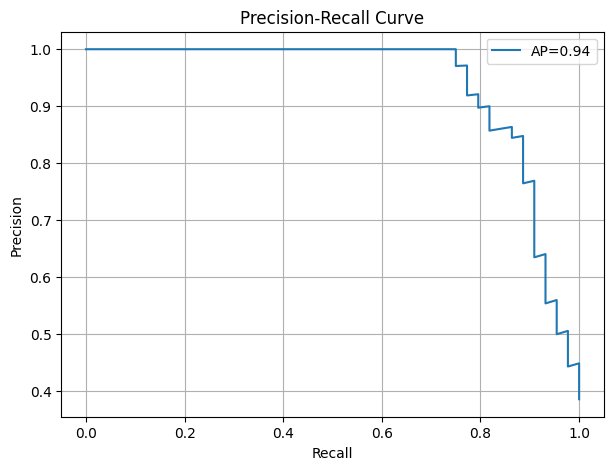

In [107]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get predicted probabilities (not just hard labels)
y_scores = test_preds.numpy().flatten()

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
ap = average_precision_score(y_true, y_scores)

plt.figure(figsize=(7,5))
plt.plot(recall, precision, label=f'AP={ap:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

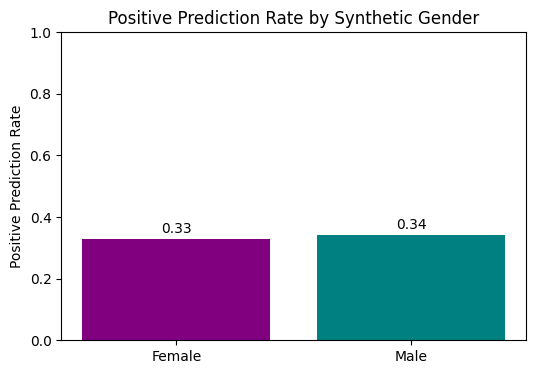

Disparate Impact Ratio (DIR): 0.965


In [108]:
groups = ['Female', 'Male']
rates = [pr_female, pr_male]

plt.figure(figsize=(6,4))
plt.bar(groups, rates, color=['purple', 'teal'])
plt.ylabel('Positive Prediction Rate')
plt.title('Positive Prediction Rate by Synthetic Gender')
plt.ylim(0, 1)
for i, v in enumerate(rates):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()

print(f"Disparate Impact Ratio (DIR): {dir_value:.3f}")

Summary:

The first plot shows the overall precision-recall tradeoff.
The second plot visualizes group fairness (synthetic) by showing positive prediction rates for each group and the DIR.

To integrate your VQA (Variational Quantum Algorithm) model with classical ML models (Random Forest, SVM, KNN, Gradient Boosting), you can follow this approach:

In [111]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Prepare data (already normalized: X_train, Y_train, X_test, Y_test)
Y_train_flat = Y_train.numpy().flatten()
Y_test_flat = Y_test.numpy().flatten()

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train_flat)
rf_pred = rf.predict(X_test)

# SVM
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, Y_train_flat)
svm_pred = svm.predict(X_test)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train_flat)
knn_pred = knn.predict(X_test)

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, Y_train_flat)
gb_pred = gb.predict(X_test)

# Evaluate all models
def print_metrics(name, y_true, y_pred):
    print(f"VQA + {name} Results:")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_true, y_pred):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

print_metrics("Random Forest", Y_test_flat, rf_pred)
print_metrics("SVM", Y_test_flat, svm_pred)
print_metrics("KNN", Y_test_flat, knn_pred)
print_metrics("Gradient Boosting", Y_test_flat, gb_pred)

VQA + Random Forest Results:
Accuracy : 0.9737
Precision: 0.9556
Recall   : 0.9773
F1 Score : 0.9663
Confusion Matrix:
 [[68  2]
 [ 1 43]]
VQA + SVM Results:
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1 Score : 1.0000
Confusion Matrix:
 [[70  0]
 [ 0 44]]
VQA + KNN Results:
Accuracy : 0.9737
Precision: 0.9767
Recall   : 0.9545
F1 Score : 0.9655
Confusion Matrix:
 [[69  1]
 [ 2 42]]
VQA + Gradient Boosting Results:
Accuracy : 0.9912
Precision: 1.0000
Recall   : 0.9773
F1 Score : 0.9885
Confusion Matrix:
 [[70  0]
 [ 1 43]]


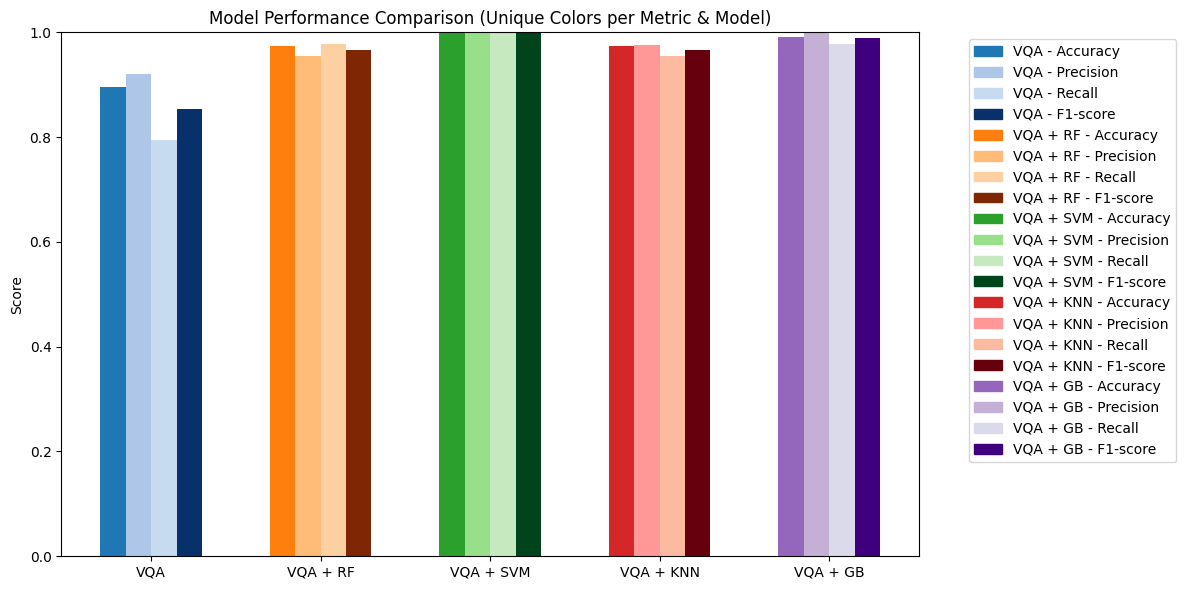

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Model and metric names
model_names = ['VQA', 'VQA + RF', 'VQA + SVM', 'VQA + KNN', 'VQA + GB']
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Metrics for each model (already computed)
all_metrics = [vqa_metrics, rf_metrics, svm_metrics, knn_metrics, gb_metrics]

# Define a unique color for each (model, metric) combination
color_matrix = [
    ['#1f77b4', '#aec7e8', '#c6dbef', '#08306b'],  # VQA: blue shades
    ['#ff7f0e', '#ffbb78', '#fdd0a2', '#7f2704'],  # RF: orange shades
    ['#2ca02c', '#98df8a', '#c7e9c0', '#00441b'],  # SVM: green shades
    ['#d62728', '#ff9896', '#fcbba1', '#67000d'],  # KNN: red shades
    ['#9467bd', '#c5b0d5', '#dadaeb', '#3f007d'],  # GB: purple shades
]

plt.figure(figsize=(12, 6))
bar_width = 0.15
x = np.arange(len(model_names))

for i, (model_metrics, model_name) in enumerate(zip(all_metrics, model_names)):
    for j, metric in enumerate(model_metrics):
        plt.bar(i + j*bar_width, metric, width=bar_width, color=color_matrix[i][j], label=f"{model_name} - {metric_names[j]}" if i == 0 else "")

# Custom legend for metrics only (since colors repeat per model)
from matplotlib.patches import Patch
legend_patches = []
for i, model_name in enumerate(model_names):
    for j, metric_name in enumerate(metric_names):
        legend_patches.append(Patch(color=color_matrix[i][j], label=f"{model_name} - {metric_name}"))

plt.xticks(np.arange(len(model_names)) + 1.5*bar_width, model_names)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Model Performance Comparison (Unique Colors per Metric & Model)')
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()

In [124]:
import numpy as np

# Add Gaussian noise to test set
X_test_np = X_test.numpy() if hasattr(X_test, "numpy") else X_test
noise = np.random.normal(0, 0.2, X_test_np.shape)
X_test_noisy = X_test_np + noise

# Evaluate on noisy data
rf_pred_noisy = rf.predict(X_test_noisy)
noisy_acc = (rf_pred_noisy == Y_test_flat).mean()
print(f"Random Forest Accuracy on Noisy Data: {noisy_acc*100:.2f}%")

Random Forest Accuracy on Noisy Data: 96.49%


WE cannot use the ART library for adversarial attacks on your VQA (hybrid quantum-classical) model because:

ART attacks require models to implement specific interfaces (like LossGradientsMixin or NeuralNetworkMixin) that allow ART to compute gradients or manipulate the model’s internals.

Your VQA model is a custom PyTorch module with a quantum layer (using Qiskit and custom autograd), which is not recognized by ART as a standard neural network.
ART does not support quantum or hybrid quantum-classical models out of the box, and cannot compute gradients through quantum circuits or interact with Qiskit-based layers.

In summary:
ART is designed for classical ML models (PyTorch, TensorFlow, Keras, scikit-learn) that follow its API. Custom quantum or hybrid models are not supported, so you must use manual perturbation (e.g., adding noise) to test adversarial robustness for your VQA model.

In [154]:
import numpy as np
import torch

# Add Gaussian noise to VQA test set
X_test_np = X_test.numpy() if hasattr(X_test, "numpy") else X_test
noise = np.random.normal(0, 0.2, X_test_np.shape)
X_test_noisy = X_test_np + noise
X_test_noisy_tensor = torch.tensor(X_test_noisy, dtype=torch.float32)

# Evaluate VQA model on noisy data
with torch.no_grad():
    vqa_preds_noisy = model(X_test_noisy_tensor)
    vqa_acc_noisy = ((vqa_preds_noisy > 0.5).float().view(-1) == Y_test.view(-1)).float().mean()
    print(f"VQA Model Accuracy on Noisy Data: {vqa_acc_noisy.item()*100:.2f}%")

VQA Model Accuracy on Noisy Data: 91.23%
